Lagrange multiplier
===

---
制約 $x+y=1$ のもとで関数 $f(x,y)=2x^2+3y^2$ を最小にする $(x,y)$ を求めよ。

---

これは $$ \underset{(x,y) \in {\bf R}^2}{\operatorname{argmax}}\ \  2x^2+3y^2\ \  {\rm subject\ to}\ \ \ \  x+y=1$$
とかくことができる。


解１
---

制約条件の$y=1-x$を$f(x,1-x)$として解く。

In [5]:
import sympy as sym
sym.init_printing()
x,y = sym.symbols('x y')

In [6]:
f=2*x**2+3*y**2
f

In [7]:
fx=f.subs(y,1-x)
fx

この極を調べよう。2次の項が負の2次関数なので最大値を持つ

In [8]:
px=sym.solve(fx.diff(x))[0]
px,fx.subs(x,px)

簡単だ。

解2
---

未定乗数$\lambda $を導入する。接線が平行になるという条件は$\nabla g = \lambda \nabla f$で表せる。
$\nabla $に相当するものがSymPyに用意されているのて使ってみよう。

In [14]:
from sympy.tensor.array import *
#x,y = sym.symbols('x y')
derive_by_array
g=x+y-1
f,g

In [19]:
basis=[x,y]
df=derive_by_array(f,basis)
dg=derive_by_array(g,basis)
df,dg

In [31]:
lam=sym.symbols('lam')
sol=sym.solve(df-lam*dg,x,y)
sol

In [42]:
lamsol=sym.solve(g.subs(x,sol[x]).subs(y,sol[y]),lam)[0]
lamsol

In [43]:
xsol=sol[x].subs(lam,lamsol)
ysol=sol[y].subs(lam,lamsol)
xsol,ysol


In [44]:
f.subs(x,xsol).subs(y,ysol)

<IPython.core.display.Javascript object>


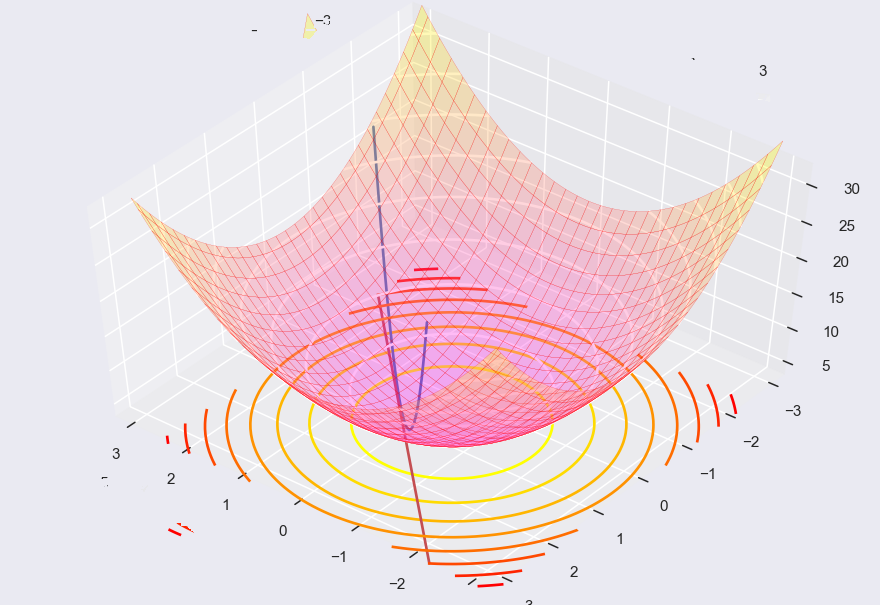

In [2]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib notebook

x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
z = np.arange(-0, 30, 1.25)

#曲面
px,py=np.meshgrid(x,y)
pz = 2*px**2 + 2*py**2

#曲線
cx = np.arange(-2, 3, .25)
cy = 1-cx
cz = 2*cx*cx + 3*cy*cy           # surface

#曲面と平面の交線
X2 = 1-y                     # line
Z2 = 2*X2**2 + 3*y**2        # line

XX,ZZ = np.meshgrid(x, z)
YY = 1-XX


fig = plt.figure()
ax = Axes3D(fig)
ax.plot(cx, cy, cz)
ax.plot_surface(px, py, pz, rstride=2, cstride=2, cmap='spring', alpha=0.3, linewidth=0.1, edgecolors='r')
ax.contour(px, py, pz, 10, lw=3, cmap="autumn_r", linestyles="solid", offset=-1)
ax.contour(px, py, pz, 10, lw=3, colors="w", linestyles="solid")
ax.plot(cx,cy,0)
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)

plt.show()